# 权重初始化 
不同的权重初始化方式会直接影响网络的训练效果，例如用全0来初始化一个深层网络，对于同一层，前向传播过程中所有计算都为0，反向传播所有梯度都相同
最终这一层所有权重更新为同一个值，训练失败。  
一个好的初始化可以让网络：  
- 加速梯度下降的收敛速度
- 提高最终模型的表现

init_utils模块提供了网络实现中一些必要的组件

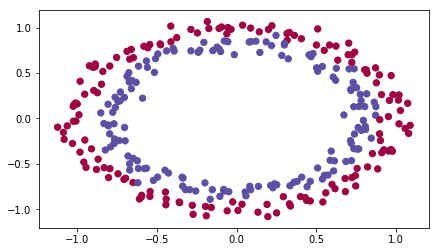

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from depends.init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from depends.init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = load_dataset()

## 三种初始化方法 #
- 0值初始化：所有权值均初始化为0
- 随机初始化：权值初始化为服从正态分布的小随机数
- He初始化：  

这里用三层神经网络进行试验

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):

    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)


    for i in range(0, num_iterations):

        a3, cache = forward_propagation(X, parameters)
        
        cost = compute_loss(a3, Y)

        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 0值初始化


In [7]:
def initialize_parameters_zeros(layers_dims):

    parameters = {}
    L = len(layers_dims)            
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros([layers_dims[l], layers_dims[l -1]])
        parameters['b' + str(l)] = np.zeros([layers_dims[l], 1])
    return parameters

In [42]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.  0.]]
b2 = [[ 0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


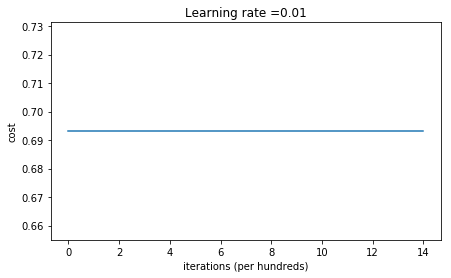

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [43]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [44]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


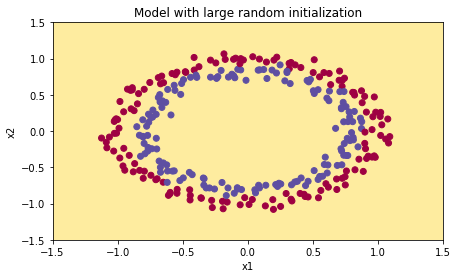

In [45]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

可以看到loss没有下降，而且网络将所有的结果都预测为了0

由于权值计算过程的对称性，所有权重值都一样,这里由于隐层激活函数使用了relu，relu对小于等于0值的神经元不进行更新，导致所有的权重依旧为0

## 随机值初始化

In [27]:
def initialize_parameters_random(layers_dims):

    np.random.seed(3)               
    parameters = {}
    L = len(layers_dims)            
    
    for l in range(1, L):

        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l -1]) * 10
        parameters['b' + str(l)] = np.zeros([layers_dims[l], 1])

    return parameters

In [39]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


E:\Jupyter Notebook\deeplearning.ai\depends\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\Jupyter Notebook\deeplearning.ai\depends\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6243558791961235
Cost after iteration 2000: 0.597942010773619
Cost after iteration 3000: 0.5637136631585865
Cost after iteration 4000: 0.5501448157404416
Cost after iteration 5000: 0.5444429957372799
Cost after iteration 6000: 0.5374387570096671
Cost after iteration 7000: 0.47589291045579285
Cost after iteration 8000: 0.3978011338109552
Cost after iteration 9000: 0.39347840990703875
Cost after iteration 10000: 0.39203172828080485
Cost after iteration 11000: 0.38924373034564463
Cost after iteration 12000: 0.3861469756250699
Cost after iteration 13000: 0.384992764995318
Cost after iteration 14000: 0.3827859195036961


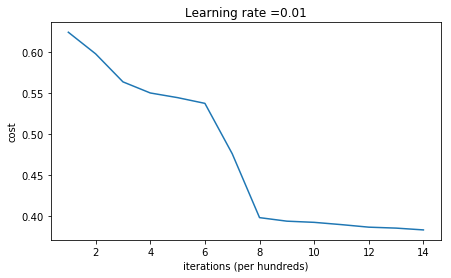

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [40]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

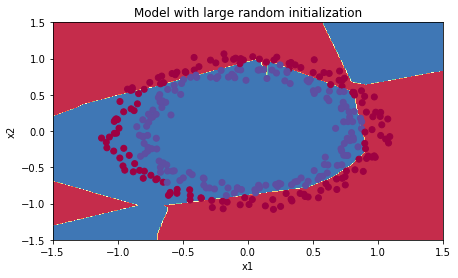

In [41]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

可以看到权值有更新，但loss较大更新较慢以致欠拟合，这是因为较大的权重导致sigmoid的输入值较大，激活值就趋近于0或1，一旦出现分类错误就会造成loss的大量增加，而反向传播时，由于导数值趋近于0，因而更新速度较慢

## He初始化
**公式：**  

$W^ = random(W) * \sqrt{\frac{2}{\text{dimension of the previous layer}}}$  

He初始化和Xavier初始化的方法很相近，都是基于随机初始化的方法改进而来：
- Xavier：`np.random.randn(layers_dims[l], layers_dims[l -1]) * sqrt(1./layers_dims[l-1])`
- He：`np.random.randn(layers_dims[l], layers_dims[l -1]) * sqrt(2./layers_dims[l-1])`  

He初始化常作为用relu激活的层的权重初始化方法

In [34]:
def initialize_parameters_he(layers_dims):

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
     
    for l in range(1, L + 1):
        
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l -1]) * np.sqrt(2. / layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros([layers_dims[l], 1])
        
    return parameters

In [35]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371806
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525931
Cost after iteration 13000: 0.08457055954024276
Cost after iteration 14000: 0.07357895962677363


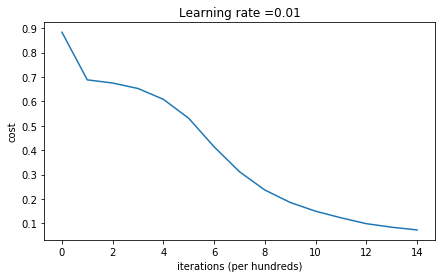

On the train set:
Accuracy: 0.993333333333
On the test set:
Accuracy: 0.96


In [36]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

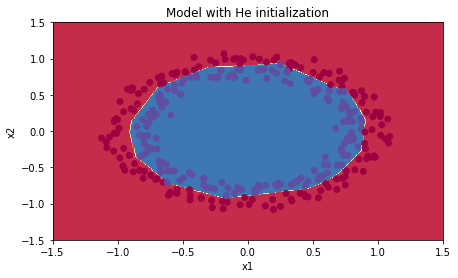

In [37]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

可以看到合适的初始化方法带来了更好的结果